In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
data = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')

In [6]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Let's take a look at unique values for potential independent variables and the feature variable Test Results

In [10]:
for column in [ 'Blood Type', 'Medical Condition','Admission Type','Medication','Test Results']:

  print(f"Unique values in {column}: {data[column].unique()}")

Unique values in Blood Type: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Unique values in Medical Condition: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Unique values in Admission Type: ['Urgent' 'Emergency' 'Elective']
Unique values in Medication: ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
Unique values in Test Results: ['Normal' 'Inconclusive' 'Abnormal']


In [12]:
test_results_counts = data['Test Results'].value_counts()

print("\nDistribution Count based on Test Results:")

print(test_results_counts)


Distribution Count based on Test Results:
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


Let's create a table for relationship between potential independent variables and Test Results


Contingency Table (Gender vs. Test Results):
Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            9338          9216    9172
Male              9289          9140    9345


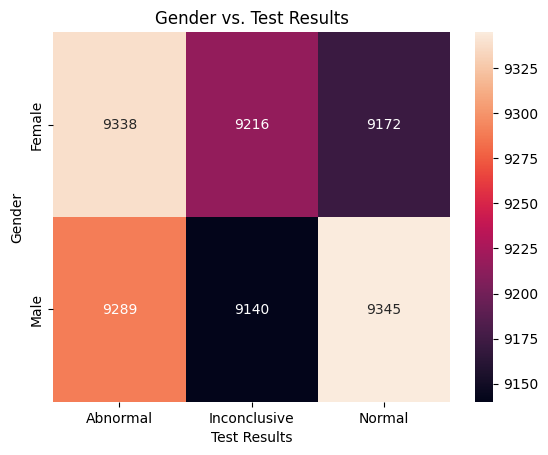

In [20]:
contingency_table = pd.crosstab(data['Gender'], data['Test Results'])



print("\nContingency Table (Gender vs. Test Results):")

print(contingency_table)



sns.heatmap(contingency_table,annot=True,fmt="d")

plt.title("Gender vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Gender")

plt.show()


Contingency Table (Blood Type vs. Test Results):
Test Results  Abnormal  Inconclusive  Normal
Blood Type                                  
A+                2333          2330    2293
A-                2336          2298    2335
AB+               2308          2325    2314
AB-               2333          2250    2362
B+                2303          2366    2276
B-                2348          2268    2328
O+                2347          2262    2308
O-                2319          2257    2301


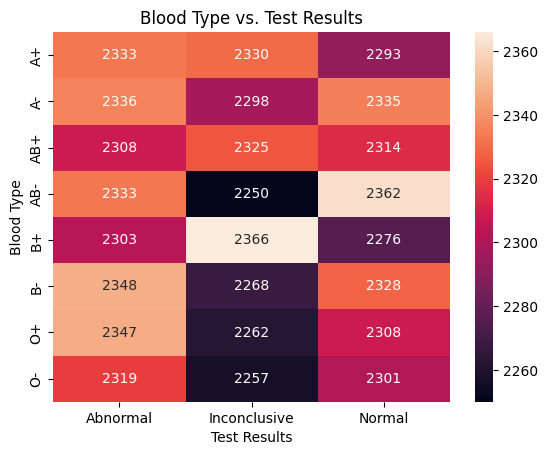

In [22]:
contingency_table = pd.crosstab(data['Blood Type'], data['Test Results'])



print("\nContingency Table (Blood Type vs. Test Results):")

print(contingency_table)



sns.heatmap(contingency_table,annot=True,fmt="d")

plt.title("Blood Type vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Blood Type")

plt.show()


Contingency Table (Medical Condition vs. Test Results):
Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3188          3088    3032
Asthma                 3009          3029    3147
Cancer                 3118          3060    3049
Diabetes               3168          3046    3090
Hypertension           3012          3091    3142
Obesity                3132          3042    3057


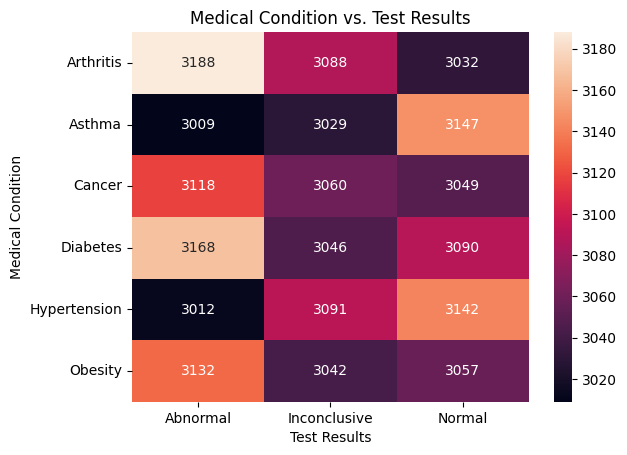

In [23]:
contingency_table = pd.crosstab(data['Medical Condition'], data['Test Results'])



print("\nContingency Table (Medical Condition vs. Test Results):")

print(contingency_table)



sns.heatmap(contingency_table,annot=True,fmt="d")

plt.title("Medical Condition vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Medical Condition")

plt.show()


Contingency Table (Admission Type vs. Test Results):
Test Results    Abnormal  Inconclusive  Normal
Admission Type                                
Elective            6296          6118    6241
Emergency           6091          6072    6106
Urgent              6240          6166    6170


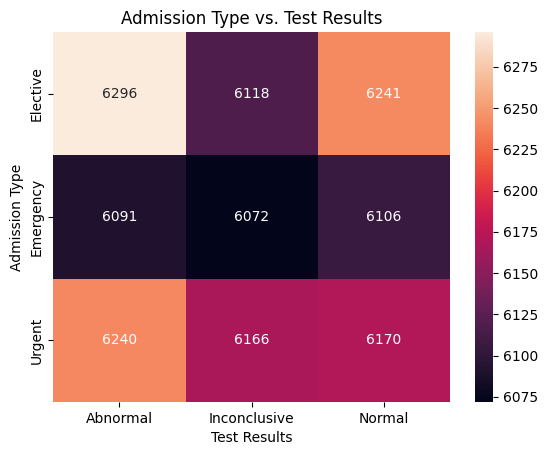

In [24]:
contingency_table = pd.crosstab(data['Admission Type'], data['Test Results'])



print("\nContingency Table (Admission Type vs. Test Results):")

print(contingency_table)



sns.heatmap(contingency_table,annot=True,fmt="d")

plt.title("Admission Type vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Admission Type")

plt.show()


Contingency Table (Medication vs. Test Results):
Test Results  Abnormal  Inconclusive  Normal
Medication                                  
Aspirin           3732          3624    3738
Ibuprofen         3747          3645    3735
Lipitor           3707          3746    3687
Paracetamol       3737          3681    3653
Penicillin        3704          3660    3704


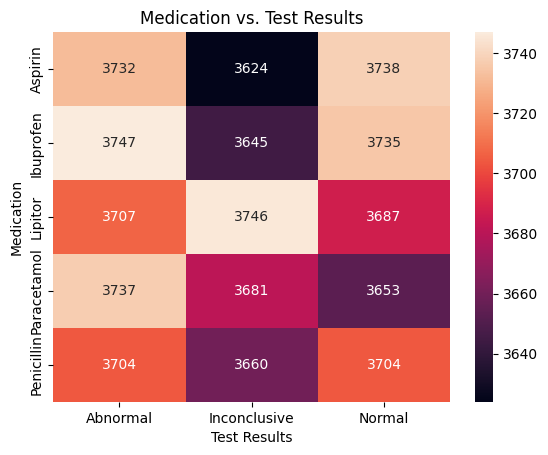

In [25]:
contingency_table = pd.crosstab(data['Medication'], data['Test Results'])



print("\nContingency Table (Medication vs. Test Results):")

print(contingency_table)



sns.heatmap(contingency_table,annot=True,fmt="d")

plt.title("Medication vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Medication")

plt.show()


Contingency Table (Insurance Provider vs. Test Results):
Test Results        Abnormal  Inconclusive  Normal
Insurance Provider                                
Aetna                   3631          3660    3622
Blue Cross              3638          3732    3689
Cigna                   3807          3718    3724
Medicare                3784          3652    3718
UnitedHealthcare        3767          3594    3764


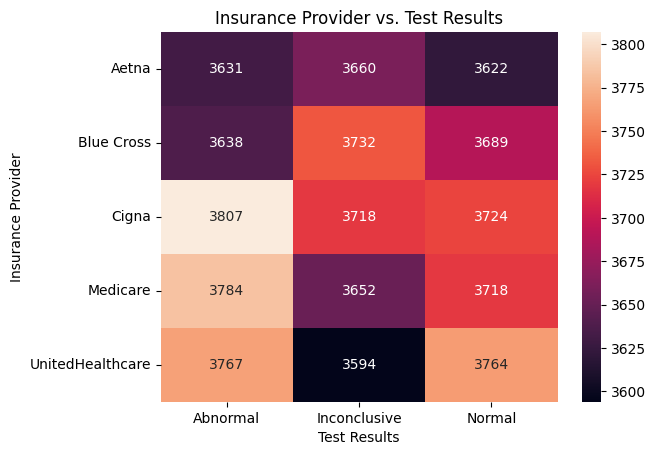

In [27]:
contingency_table = pd.crosstab(data['Insurance Provider'], data['Test Results'])



print("\nContingency Table (Insurance Provider vs. Test Results):")

print(contingency_table)



sns.heatmap(contingency_table,annot=True,fmt="d")

plt.title("Insurance Provider vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Insurance Provider")

plt.show()

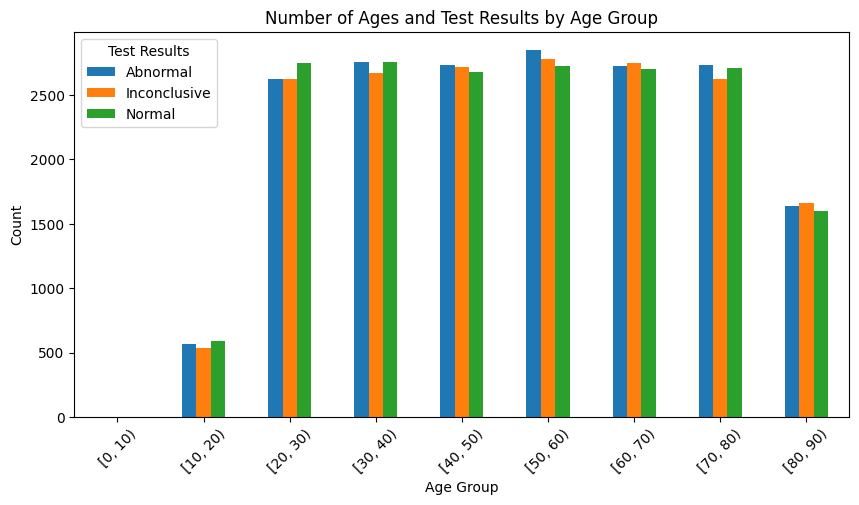

In [26]:
data['Age Group'] = pd.cut(data['Age'], bins=range(0, 100, 10), right=False)



# Group by age group and test results, then count the occurrences

grouped_data = data.groupby(['Age Group', 'Test Results'] , observed=False)['Age'].count().unstack()



# Plot the bar chart

grouped_data.plot(kind='bar', figsize=(10,5))

plt.title('Number of Ages and Test Results by Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Test Results')

plt.show()

From our data visualizations, it seems unclear if any of our inputs have an effect on the feature variable. Let us use classification methods to determine if there is a way to predict our feature variable.

In [38]:
le_gender = LabelEncoder()

le_blood_type = LabelEncoder()

le_medical_condition = LabelEncoder()

le_medication = LabelEncoder()

le_insurance_provider = LabelEncoder()

le_admission_type = LabelEncoder()



le_test_results = LabelEncoder()


data['Gender'] = le_gender.fit_transform(data['Gender'])

data['Blood Type'] = le_blood_type.fit_transform(data['Blood Type'])

data['Medical Condition'] = le_medical_condition.fit_transform(data['Medical Condition'])

data['Medication'] = le_medication.fit_transform(data['Medication'])

data['Insurance Provider'] = le_insurance_provider.fit_transform(data['Insurance Provider'])

data['Admission Type'] = le_admission_type.fit_transform(data['Admission Type'])



data['Test Results'] = le_test_results.fit_transform(data['Test Results'])


X = data[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication']]

y = data['Test Results']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

models = {


    'Decision Tree': DecisionTreeClassifier(),

    'Random Forest': RandomForestClassifier(),

    'Support Vector Machine': SVC(),

    'K-Nearest Neighbors': KNeighborsClassifier()

}


results = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results[model_name] = {

        'Accuracy': accuracy,

        'Classification Report': classification_report(y_test, y_pred ,zero_division=1 ),

        'Confusion Matrix': confusion_matrix(y_test, y_pred,)

    }


for model_name, result in results.items():

    print(f"\nModel: {model_name}")

    print(f"Accuracy: {result['Accuracy']:.4f}")

    print("Classification Report:")

    print(result['Classification Report'])

    print("Confusion Matrix:")

    print(result['Confusion Matrix'])


Model: Decision Tree
Accuracy: 0.3382
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.43      0.38      3691
           1       0.34      0.33      0.33      3667
           2       0.34      0.26      0.29      3742

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.33     11100
weighted avg       0.34      0.34      0.33     11100

Confusion Matrix:
[[1586 1172  933]
 [1535 1200  932]
 [1632 1142  968]]

Model: Random Forest
Accuracy: 0.3414
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.35      0.34      3691
           1       0.34      0.33      0.34      3667
           2       0.35      0.34      0.34      3742

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100

Confusion Matrix:
[[1287 1214 1190]
 [122

We can see that none of our classification methods have a great accuracy, meaning it is hard to predict the test results given our variables

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv
